In [5]:
!pip install pandas_datareader
!pip install pmdarima

import os 

import pandas_datareader.data as pdr 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

import matplotlib.pyplot as plt 
import matplotlib 
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima 

import seaborn as sns 

plt.style.use('seaborn-whitegrid')
#sns.set_style("white")
%matplotlib inline

import itertools

You should consider upgrading via the '/usr/local/anaconda3/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [6]:
import pandas as pd 

data = pd.read_csv('갤러리아.csv')
#data.drop(['상품단가','주문건수','폐기건수','주문금액','할인금액','부가세액','기타금액','총합계','결제수단','상품명'],axis=1, inplace=True)
data

,day,net_profit
0,2019.1.2,566085.0000
1,2019.1.3,726360.0000
2,2019.1.4,732362.0000
3,2019.1.5,705722.0000
4,2019.1.6,658637.0000
...,...,...
143,2019.5.27,546217.3735
144,2019.5.28,546217.3735
145,2019.5.29,546217.3735
146,2019.5.30,546217.3735


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         148 non-null    object 
 1   net_profit  148 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


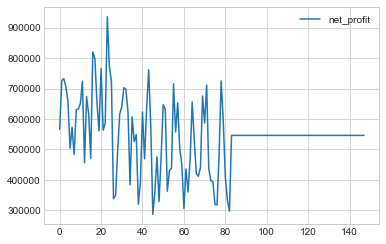

In [8]:
 fig = data.plot()

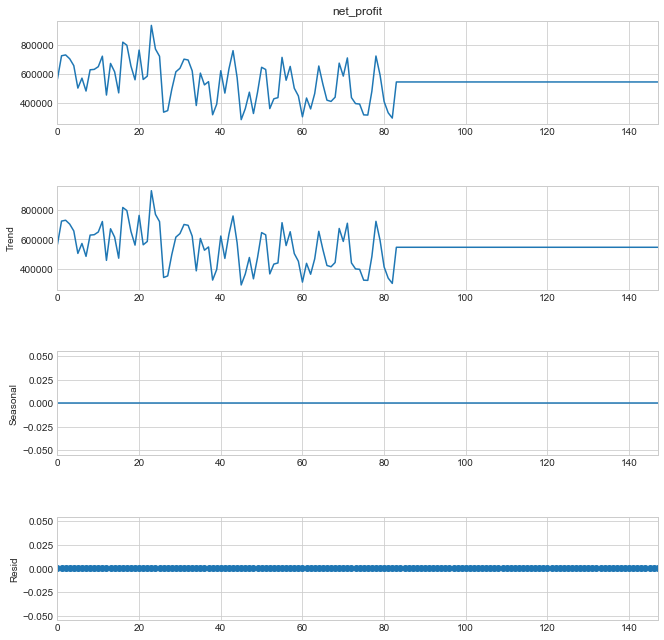

In [9]:
decomposition = sm.tsa.seasonal_decompose(data['net_profit'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

In [10]:
train_data, test_data = train_test_split(data, test_size=0.5, shuffle=False)

ValueError: could not convert string to float: '2019.1.2'

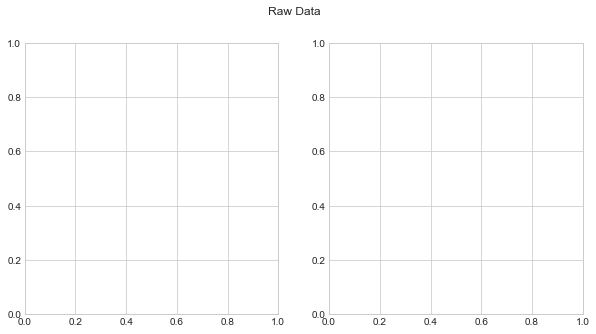

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Raw Data")
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1])

In [12]:
# Differencing 

diff_train_data = train_data.copy()
diff_train_data = diff_train_data['net_profit'].diff()
diff_train_data = diff_train_data.dropna()
print('###### Raw Data ######')
print(train_data)
print('### Differenced Data ###')
print(diff_train_data)

###### Raw Data ######
          day  net_profit
0    2019.1.2    566085.0
1    2019.1.3    726360.0
2    2019.1.4    732362.0
3    2019.1.5    705722.0
4    2019.1.6    658637.0
..        ...         ...
69  2019.3.14    675811.0
70  2019.3.15    586542.0
71  2019.3.16    711631.0
72  2019.3.17    438451.0
73  2019.3.18    397359.0

[74 rows x 2 columns]
### Differenced Data ###
1     160275.0
2       6002.0
3     -26640.0
4     -47085.0
5    -154635.0
        ...   
69    234544.0
70    -89269.0
71    125089.0
72   -273180.0
73    -41092.0
Name: net_profit, Length: 73, dtype: float64


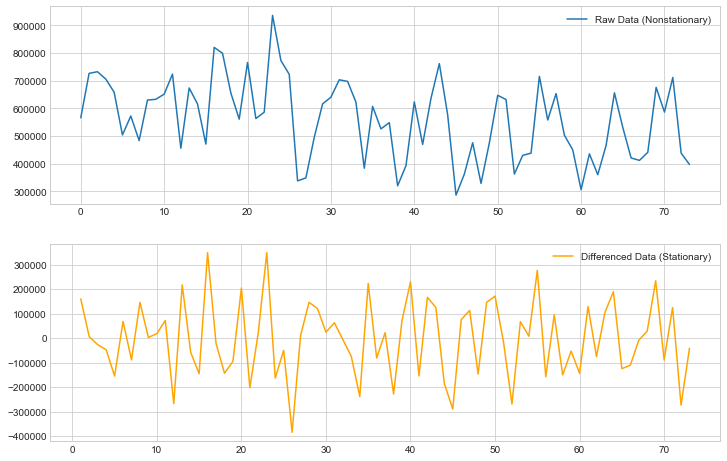

In [13]:
#Differenced data plot
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['net_profit'])
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


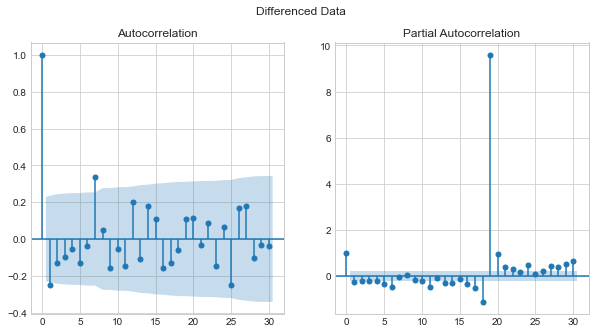

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1]);

In [15]:
model = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()

model_fit.summary()

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: could not convert string to float: '2019.1.2'

In [16]:
# Parameter search 

print('Examples of parameter combinations for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))

aic=[]
for i in pdq:
  model = ARIMA(train_data.values, order=(i))
  model_fit = model.fit()
  print(f'ARIMA: {i} >>AIC : {round(model_fit.aic,2)}')
  aic.append(round(model_fit.aic,2))

Examples of parameter combinations for Seasonal ARIMA...


ValueError: could not convert string to float: '2019.1.2'

In [68]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [69]:
# Search optimal parameters
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[]

In [70]:
model_opt = ARIMA(train_data.values, order=optimal[0][0])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

IndexError: list index out of range

In [71]:
#use Model to Forecast - ARIMA
pred = model_opt_fit.forecast(len(test_data))
pred_value = pred[0]

pred_ub = pred[2][:,0]
pred_lb = pred[2][:,1]
pred_index = list(test_data.index)
r2 = r2_score(test_data, pred_value)

IndexError: invalid index to scalar variable.

In [72]:

import pandas as pd 
import csv

arima_data=pd.DataFrame(pred_value, pred_index)

arima_data


arima_data.to_csv('arimaseoulforest.csv', index=False)


ValueError: DataFrame constructor not properly called!

AttributeError: 'DataFrame' object has no attribute 'netprofit'

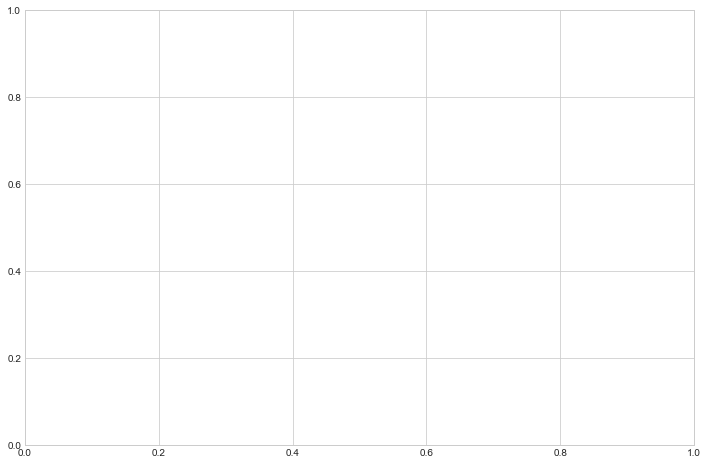

In [17]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(data.index, data.netprofit)
# 그냥 날짜 넣으니까 인식못해서 이렇게 함.
ax.vlines(pd.to_datetime('2019-02-28'), 0, 1000,linestyle = '--', color='r', 
         label='Start of Forecast');
ax.plot(pred_index, pred_value, label = 'prediction',color='orange')
# 요걸로 범위 채우기
ax.fill_between(pred_index, pred_lb, pred_ub, color='k', alpha=0.1,
               label='0.95 prediciton interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score:{round(r2,2)})')
plt.show()


In [ ]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(test_data,pred_value))
print("MSE: ", metrics.mean_squared_error(test_data,pred_value))


In [ ]:
# Diagnosis Check - SARIMA 

print('Examples of parameter combinations for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

aic=[]
params=[]
for i in pdq: 
  for j in seasonal_pdq:
    try:
      model = SARIMAX(train_data.values, ordr=(i), seasonal_order =(j))
      model_fit = model.fit()
      print(f'SARIMA: {i}{j} >> AIC : {round(model_fit.aic,2)}')
      aic.append(round(model_fit.aic,2))
      params.append((i,j))
    except:
      continue

In [ ]:
# Search optimal parameters

optimal = [(params[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

In [ ]:
model_opt = SARIMAX(train_data.values, order=optimal[0][0][0], seasonal_order = optimal [0][0][1])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

In [ ]:
#use Model to Forecast -SARIMA 
prediction = model_opt_fit.get_forecast(len(test_data))
predicted_value = prediction.predicted_mean
prediction_ub = prediction.conf_int()[:0]
predicted_lb = prediction.conf_int()[:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)


In [ ]:

sarima_data=pd.DataFrame(predicted_value, predict_index)

sarima_data.to_csv('sarimaseoulforest.csv', index=False)


In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
ax.plot(data.index, data)
ax.vlines(pd.to_datetime('2019-03-28'), 0,700, linestyle ='--', color='r',
         label = 'Start of  Forcast')
ax.plot(predict_index, predicted_value, label='prediction')
ax.fill_between(predict_index, predicted_lb, prediction_ub, color='k',
               alpha= 0.1, label='0.95 prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {optimal[0][0][0], optimal[0][0][1]} prediction results (r2score: {round(r2,2)})')
plt.show()

In [ ]:
print("MAE: ", metrics.mean_absolute_error(test_data,predicted_value))
print("MSE: ", metrics.mean_squared_error(test_data,predicted_value))


In [ ]:
# 3.4.3 Diagnosis Check- auto_arima

auto_arima_model = auto_arima(train_data, start_p=1, start_q=1,
                              max_p=3, max_q=3, m=12, seasonal=True,
                              d=1, D=1,
                              max_P=3, max_Q=3,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True, 
                              stepwise=False)

In [ ]:
auto_arima_model.summary()

In [ ]:
# use Model to Forecast-auto_arima 
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
prediction_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

In [ ]:
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(data.index, data)
ax.vlines(pd.to_datetime('2019-03-28'), 0, 700, linestyle='--',
         color='r', label='Start of Forecast')
ax.plot(predict_index, predicted_value, label='Prediction')
ax.fill_between(predict_index, prediction_ub, predicted_lb,
               color='k', alpha=1, label='interval')
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA({auto_arima_model.order, auto_arima_model.seasonal_order}) prediction results: {round(r2,2)}(r2 score)' )

In [ ]:
print("MAE: ", metrics.mean_absolute_error(test_data,predicted_value))
print("MSE: ", metrics.mean_squared_error(test_data,predicted_value))